<a href="https://colab.research.google.com/github/as9786/ComputerVision/blob/main/Oxford/DatasetEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

In [5]:
df = pd.read_csv('/content/drive/MyDrive/oxford_pet/annotations/list.txt',skiprows=6,delimiter=' ',header=None)
df.columns = ['file_name','id','species','breed']
df

,file_name,id,species,breed
0,Abyssinian_100,1,1,1
1,Abyssinian_101,1,1,1
2,Abyssinian_102,1,1,1
3,Abyssinian_103,1,1,1
4,Abyssinian_104,1,1,1
...,...,...,...,...
7344,yorkshire_terrier_96,37,2,25
7345,yorkshire_terrier_97,37,2,25
7346,yorkshire_terrier_98,37,2,25
7347,yorkshire_terrier_99,37,2,25


In [6]:
print(df['species'].value_counts().sort_index())

1    2371
2    4978
Name: species, dtype: int64


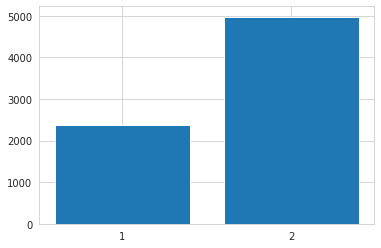

In [7]:
value_counts = df['species'].value_counts().sort_index()

plt.bar(range(len(value_counts)),value_counts.values,align='center')
plt.xticks(range(len(value_counts)),value_counts.index.values)

plt.show()

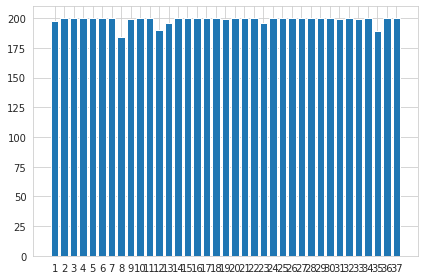

In [9]:
value_counts = df['id'].value_counts().sort_index()

plt.bar(range(len(value_counts)),value_counts.values,align='center')
plt.xticks(range(len(value_counts)),value_counts.index.values)

plt.tight_layout()
plt.show()

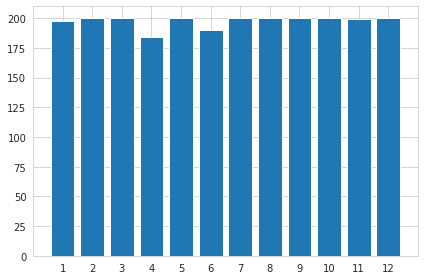

In [10]:
# 고양이
value_counts = df[df['species']==1]['breed'].value_counts().sort_index()

plt.bar(range(len(value_counts)),value_counts.values,align='center')
plt.xticks(range(len(value_counts)),value_counts.index.values)

plt.tight_layout()
plt.show()

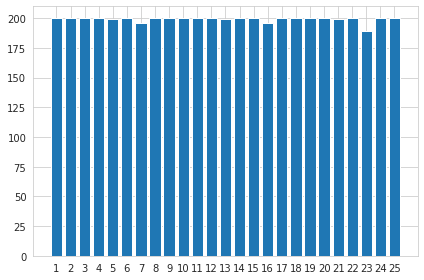

In [11]:
value_counts = df[df['species']==2]['breed'].value_counts().sort_index()

plt.bar(range(len(value_counts)),value_counts.values,align='center')
plt.xticks(range(len(value_counts)),value_counts.index.values)

plt.tight_layout()
plt.show()

In [12]:
import os
from glob import glob

In [14]:
image_dir = '/content/drive/MyDrive/oxford_pet/images/'
bbox_dir = '/content/drive/MyDrive/oxford_pet/annotations/xmls/'
seg_dir = '/content/drive/MyDrive/oxford_pet/annotations/trimaps/'

In [15]:
image_files = glob(image_dir+'*.jpg')
len(image_files)

7390

In [16]:
image_files[:10]

['/content/drive/MyDrive/oxford_pet/images/japanese_chin_127.jpg',
 '/content/drive/MyDrive/oxford_pet/images/great_pyrenees_45.jpg',
 '/content/drive/MyDrive/oxford_pet/images/Birman_27.jpg',
 '/content/drive/MyDrive/oxford_pet/images/Bengal_88.jpg',
 '/content/drive/MyDrive/oxford_pet/images/japanese_chin_145.jpg',
 '/content/drive/MyDrive/oxford_pet/images/japanese_chin_134.jpg',
 '/content/drive/MyDrive/oxford_pet/images/pug_108.jpg',
 '/content/drive/MyDrive/oxford_pet/images/boxer_49.jpg',
 '/content/drive/MyDrive/oxford_pet/images/leonberger_162.jpg',
 '/content/drive/MyDrive/oxford_pet/images/beagle_115.jpg']

In [18]:
seg_files = glob(seg_dir+'*.png')
len(seg_files)

7390

In [19]:
seg_files[:10]

['/content/drive/MyDrive/oxford_pet/annotations/trimaps/shiba_inu_207.png',
 '/content/drive/MyDrive/oxford_pet/annotations/trimaps/Birman_128.png',
 '/content/drive/MyDrive/oxford_pet/annotations/trimaps/boxer_26.png',
 '/content/drive/MyDrive/oxford_pet/annotations/trimaps/english_cocker_spaniel_159.png',
 '/content/drive/MyDrive/oxford_pet/annotations/trimaps/chihuahua_102.png',
 '/content/drive/MyDrive/oxford_pet/annotations/trimaps/Egyptian_Mau_145.png',
 '/content/drive/MyDrive/oxford_pet/annotations/trimaps/Siamese_30.png',
 '/content/drive/MyDrive/oxford_pet/annotations/trimaps/saint_bernard_19.png',
 '/content/drive/MyDrive/oxford_pet/annotations/trimaps/Siamese_69.png',
 '/content/drive/MyDrive/oxford_pet/annotations/trimaps/keeshond_1.png']

In [20]:
bbox_files = glob(bbox_dir+'*.xml')
len(bbox_files)

3686

In [21]:
bbox_files[:10]

['/content/drive/MyDrive/oxford_pet/annotations/xmls/miniature_pinscher_186.xml',
 '/content/drive/MyDrive/oxford_pet/annotations/xmls/leonberger_179.xml',
 '/content/drive/MyDrive/oxford_pet/annotations/xmls/keeshond_122.xml',
 '/content/drive/MyDrive/oxford_pet/annotations/xmls/miniature_pinscher_127.xml',
 '/content/drive/MyDrive/oxford_pet/annotations/xmls/keeshond_145.xml',
 '/content/drive/MyDrive/oxford_pet/annotations/xmls/newfoundland_144.xml',
 '/content/drive/MyDrive/oxford_pet/annotations/xmls/miniature_pinscher_108.xml',
 '/content/drive/MyDrive/oxford_pet/annotations/xmls/newfoundland_173.xml',
 '/content/drive/MyDrive/oxford_pet/annotations/xmls/leonberger_186.xml',
 '/content/drive/MyDrive/oxford_pet/annotations/xmls/newfoundland_120.xml']

In [22]:
import cv2 
import xml.etree.ElementTree as et
from matplotlib.patches import Rectangle

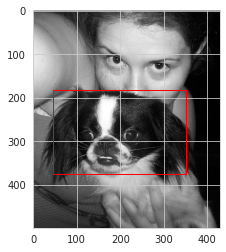

In [25]:
image_path = image_files[5]
bbox_path = image_path.replace(image_dir,bbox_dir).replace('jpg','xml')

image = cv2.imread(image_path)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

tree = et.parse(bbox_path)

xmin = float(tree.find('./object/bndbox/xmin').text)
xmax = float(tree.find('./object/bndbox/xmax').text)
ymin = float(tree.find('./object/bndbox/ymin').text)
ymax = float(tree.find('./object/bndbox/ymax').text)

rect_x = xmin
rect_y = ymin
rect_w = xmax-xmin
rect_h = ymax-ymin

rect = Rectangle((rect_x,rect_y),rect_w,rect_h,fill=False,color='red')
plt.axes().add_patch(rect)
plt.imshow(image)

plt.show()

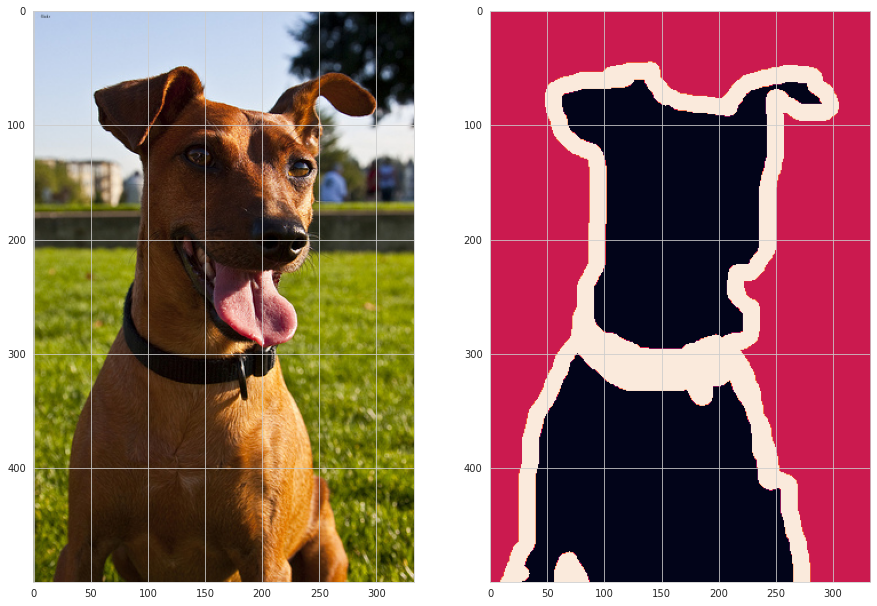

In [26]:
image_path = image_files[110]
seg_path = image_path.replace(image_dir,seg_dir).replace('jpg','png') 

image = cv2.imread(image_path)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
seg_map = cv2.imread(seg_path,cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(seg_map)

plt.show()



In [27]:
from sklearn.model_selection import KFold

In [39]:
kf = KFold(n_splits=5,shuffle=True,random_state=42)

for idx, (t,v) in enumerate(kf.split(df),1):
    print(t,v,len(v))
    df.loc[v,'fold'] = idx

[   1    2    3 ... 7346 7347 7348] [   0    8   14 ... 7339 7341 7345] 1470
[   0    1    2 ... 7346 7347 7348] [  12   15   26 ... 7340 7342 7344] 1470
[   0    1    2 ... 7345 7346 7348] [   6    7   18 ... 7333 7343 7347] 1470
[   0    3    4 ... 7345 7347 7348] [   1    2   10 ... 7335 7336 7346] 1470
[   0    1    2 ... 7345 7346 7347] [   3    4    5 ... 7334 7338 7348] 1469


In [35]:
kf.split(df)

<generator object _BaseKFold.split at 0x7fd88dab3ad0>

In [32]:
print(len(df[df['fold']==1]))
print(len(df[df['fold']!=1]))

1470
5879


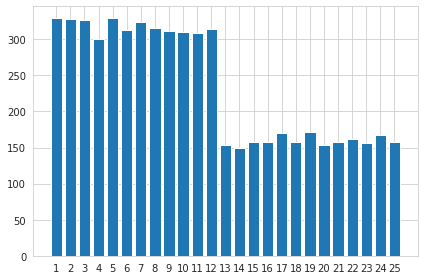

In [33]:
value_counts = df[df['fold']!=5]['breed'].value_counts().sort_index()

plt.bar(range(len(value_counts)),value_counts.values,align='center')
plt.xticks(range(len(value_counts)),value_counts.index.values)

plt.tight_layout()
plt.show()

In [34]:
df['fold']

0       1.0
1       4.0
2       4.0
3       5.0
4       5.0
       ... 
7344    2.0
7345    1.0
7346    4.0
7347    3.0
7348    5.0
Name: fold, Length: 7349, dtype: float64

In [40]:
from sklearn.model_selection import StratifiedKFold

In [43]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

df['fold'] = -1
for idx, (t,v) in enumerate(skf.split(df,df['id']),1):
    print(t,v,len(v))
    df.loc[v,'fold'] = idx

[   0    1    3 ... 7346 7347 7348] [   2    7    8 ... 7326 7337 7345] 1470
[   1    2    3 ... 7346 7347 7348] [   0   12   13 ... 7323 7335 7339] 1470
[   0    2    3 ... 7345 7347 7348] [   1   14   19 ... 7341 7343 7346] 1470
[   0    1    2 ... 7346 7347 7348] [   3    4    5 ... 7334 7338 7342] 1470
[   0    1    2 ... 7343 7345 7346] [   9   21   23 ... 7344 7347 7348] 1469


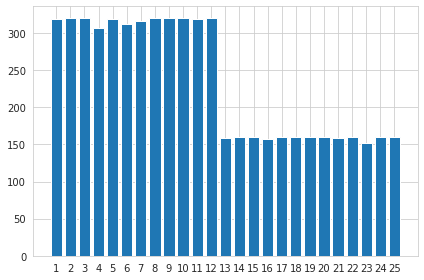

In [44]:
value_counts = df[df['fold']!=5]['breed'].value_counts().sort_index()

plt.bar(range(len(value_counts)),value_counts.values,align='center')
plt.xticks(range(len(value_counts)),value_counts.index.values)

plt.tight_layout()
plt.show()

In [45]:
df.to_csv('/content/drive/MyDrive/FastCampus/이미지처리/kfolds.csv',index=False)